In [1]:
#Import the necessary libraries
import matplotlib.pyplot as plt
import matplotlib
'''matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})'''
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from scipy.stats import spearmanr

In [2]:
data_2009=pd.read_csv('Red_Sox/red_sox_2009.csv')
data_2010=pd.read_csv('Red_Sox/red_sox_2010.csv')
data_2011=pd.read_csv('Red_Sox/red_sox_2011.csv')
data_2012=pd.read_csv('Red_Sox/red_sox_2012.csv')

In [9]:
data_2009

,transaction_date,sectiontype,price_per_ticket,number_of_tickets,gamemonth,team,day_game,weekend_game,gamedate,logprice,days_from_transaction_until_game,season
0,2_1,RFGS,45.00,4,JUN,ATL,0.0,1.0,JUN 19,3.806663,142,Mid-Season
1,2_1,LowerBleachers,53.00,4,JUN,ATL,0.0,1.0,JUN 20,3.970292,143,Mid-Season
2,2_1,IFGS,84.99,4,JUN,ATL,0.0,1.0,JUN 19,4.442533,142,Mid-Season
3,2_1,IFGS,151.00,2,JUN,ATL,0.0,1.0,JUN 19,5.017280,142,Mid-Season
4,2_1,RFGS,45.74,4,JUN,ATL,1.0,1.0,JUN 21,3.822973,144,Mid-Season
...,...,...,...,...,...,...,...,...,...,...,...,...
105668,8_9,IFGS,47.00,2,SEP,TOR,0.0,0.0,SEP 30,3.850147,52,Late Season
105669,8_9,RFGS,67.00,2,AUG,TOR,1.0,1.0,AUG 30,4.204692,21,Late Season
105670,8_9,RFGS,22.00,2,SEP,TOR,0.0,0.0,SEP 29,3.091043,51,Late Season
105671,8_9,RFGS,37.00,2,SEP,TOR,0.0,0.0,SEP 28,3.610918,50,Late Season


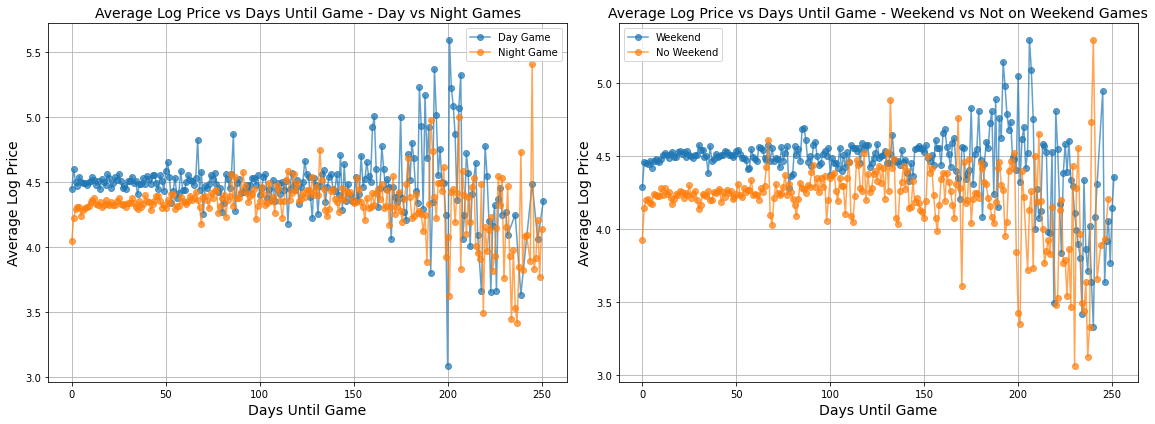

In [3]:
# Create separate DataFrames for day and night games
df_day = data_2009[data_2009['day_game'] == 1]
df_night = data_2009[data_2009['day_game'] == 0]

# Create separate DataFrames for weekend and non-weekend games
df_weekend = data_2009[data_2009['weekend_game'] == 1]
df_no_weekend = data_2009[data_2009['weekend_game'] == 0]

# Group by 'days_from_transaction_until_game' and calculate average logprice for day and night games
avg_logprice_day = df_day.groupby('days_from_transaction_until_game')['logprice'].mean()
avg_logprice_night = df_night.groupby('days_from_transaction_until_game')['logprice'].mean()

# Group by 'days_from_transaction_until_game' and calculate average logprice for weekend and non-weekend games
avg_logprice_weekend = df_weekend.groupby('days_from_transaction_until_game')['logprice'].mean()
avg_logprice_no_weekend = df_no_weekend.groupby('days_from_transaction_until_game')['logprice'].mean()

# Create subplots with two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot for day and night games
axs[0].plot(avg_logprice_day.index, avg_logprice_day.values, label='Day Game', marker='o', alpha=0.7)
axs[0].plot(avg_logprice_night.index, avg_logprice_night.values, label='Night Game', marker='o', alpha=0.7)
axs[0].set_title('Average Log Price vs Days Until Game - Day vs Night Games', fontsize=14)
axs[0].set_xlabel('Days Until Game', fontsize=14)
axs[0].set_ylabel('Average Log Price', fontsize=14)
axs[0].legend()
axs[0].grid(True)

# Scatter plot for weekend and non-weekend games
axs[1].plot(avg_logprice_weekend.index, avg_logprice_weekend.values, label='Weekend', marker='o', alpha=0.7)
axs[1].plot(avg_logprice_no_weekend.index, avg_logprice_no_weekend.values, label='No Weekend', marker='o', alpha=0.7)
axs[1].set_title('Average Log Price vs Days Until Game - Weekend vs Not on Weekend Games', fontsize=14)
axs[1].set_xlabel('Days Until Game', fontsize=14)
axs[1].set_ylabel('Average Log Price', fontsize=14)
axs[1].legend()
axs[1].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
#plt.savefig('night.pgf')
plt.show()

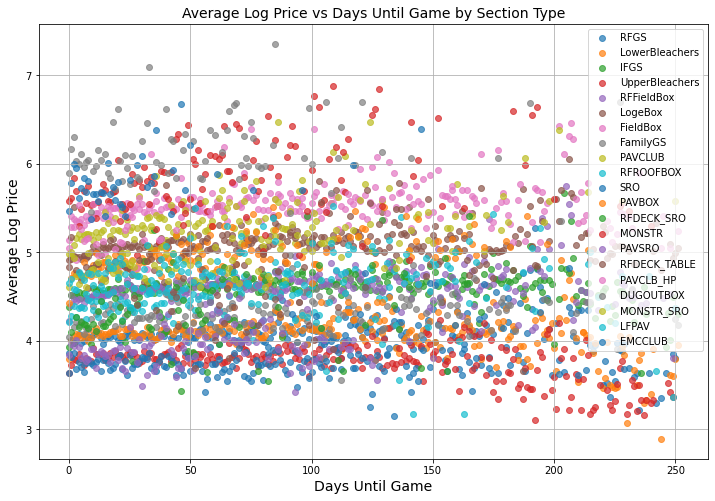

In [4]:
# Group by 'sectiontype' and 'days_from_transaction_until_game' and calculate average logprice
df_grouped = data_2009.groupby(['sectiontype', 'days_from_transaction_until_game'])['logprice'].mean().reset_index()

# Create a scatter plot with different markers/colors for each sectiontype
plt.figure(figsize=(12, 8))

# Unique sectiontypes in your dataset
unique_sectiontypes = data_2009['sectiontype'].unique()

for sectiontype in unique_sectiontypes:
    df_sectiontype = df_grouped[df_grouped['sectiontype'] == sectiontype]
    plt.scatter(
        df_sectiontype['days_from_transaction_until_game'],
        df_sectiontype['logprice'],
        label=sectiontype,
        alpha=0.7
    )

plt.title('Average Log Price vs Days Until Game by Section Type', fontsize=14)
plt.xlabel('Days Until Game', fontsize=14)
plt.ylabel('Average Log Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

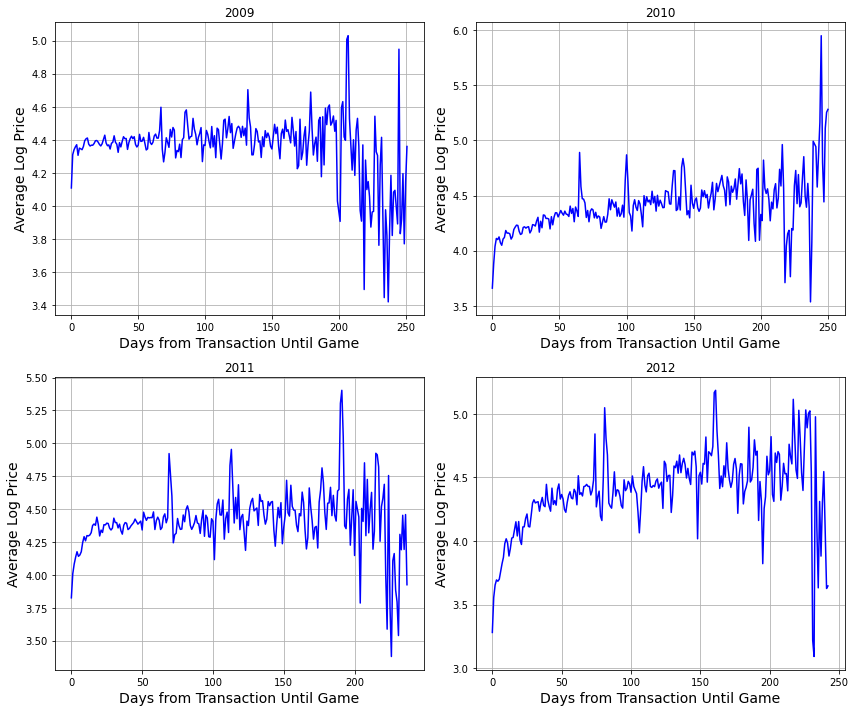

In [5]:
# Group by 'days_from_transaction_until_game' and calculate average 'logprice' for each game
avg_logprice_per_day_2009 = data_2009.groupby('days_from_transaction_until_game')['logprice'].mean().reset_index()
avg_logprice_per_day_2010 = data_2010.groupby('days_from_transaction_until_game')['logprice'].mean().reset_index()
avg_logprice_per_day_2011 = data_2011.groupby('days_from_transaction_until_game')['logprice'].mean().reset_index()
avg_logprice_per_day_2012 = data_2012.groupby('days_from_transaction_until_game')['logprice'].mean().reset_index()

# Create a 2x2 layout
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Line plot for 2009
axs[0, 0].plot(avg_logprice_per_day_2009['days_from_transaction_until_game'], avg_logprice_per_day_2009['logprice'], color='blue')
axs[0, 0].set_title('2009')
axs[0, 0].set_xlabel('Days from Transaction Until Game', fontsize=14)
axs[0, 0].set_ylabel('Average Log Price', fontsize=14)
axs[0, 0].grid(True)

# Line plot for 2010
axs[0, 1].plot(avg_logprice_per_day_2010['days_from_transaction_until_game'], avg_logprice_per_day_2010['logprice'], color='blue')
axs[0, 1].set_title('2010')
axs[0, 1].set_xlabel('Days from Transaction Until Game', fontsize=14)
axs[0, 1].set_ylabel('Average Log Price', fontsize=14)
axs[0, 1].grid(True)

# Line plot for 2011
axs[1, 0].plot(avg_logprice_per_day_2011['days_from_transaction_until_game'], avg_logprice_per_day_2011['logprice'], color='blue')
axs[1, 0].set_title('2011')
axs[1, 0].set_xlabel('Days from Transaction Until Game', fontsize=14)
axs[1, 0].set_ylabel('Average Log Price', fontsize=14)
axs[1, 0].grid(True)

# Line plot for 2012
axs[1, 1].plot(avg_logprice_per_day_2012['days_from_transaction_until_game'], avg_logprice_per_day_2012['logprice'], color='blue')
axs[1, 1].set_title('2012')
axs[1, 1].set_xlabel('Days from Transaction Until Game', fontsize=14)
axs[1, 1].set_ylabel('Average Log Price', fontsize=14)
axs[1, 1].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

In [6]:
season_mapping = {
    'APR': 'Early Season',
    'MAY': 'Early Season',
    'JUN': 'Mid-Season',
    'JUL': 'Mid-Season',
    'AUG': 'Late Season',
    'SEP': 'Late Season',
    'OCT': 'Late Season'
}

data_2009['season'] = data_2009['gamemonth'].map(season_mapping)
data_2010['season'] = data_2010['gamemonth'].map(season_mapping)
data_2011['season'] = data_2011['gamemonth'].map(season_mapping)
data_2012['season'] = data_2012['gamemonth'].map(season_mapping)

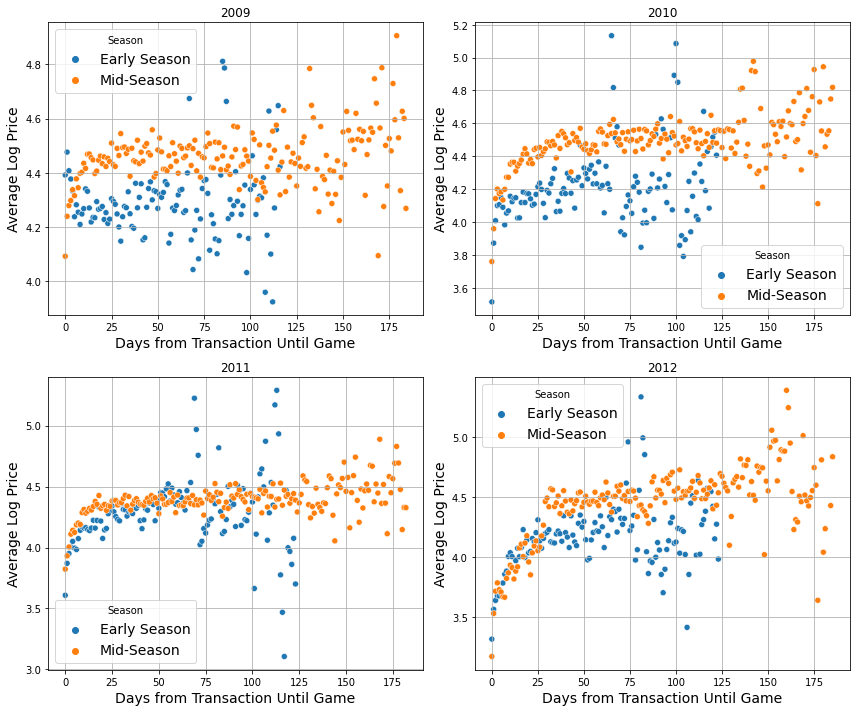

In [8]:
# Group by 'season' and 'days_from_transaction_until_game', then calculate the mean of 'logprice'
df_grouped_2009 = data_2009.groupby(['season', 'days_from_transaction_until_game'])['logprice'].mean().reset_index()
df_grouped_2010 = data_2010.groupby(['season', 'days_from_transaction_until_game'])['logprice'].mean().reset_index()
df_grouped_2011 = data_2011.groupby(['season', 'days_from_transaction_until_game'])['logprice'].mean().reset_index()
df_grouped_2012 = data_2012.groupby(['season', 'days_from_transaction_until_game'])['logprice'].mean().reset_index()

# Filter data for Early and Mid seasons
df_grouped_2009_filtered = df_grouped_2009[df_grouped_2009['season'].isin(['Early Season', 'Mid-Season'])]
df_grouped_2010_filtered = df_grouped_2010[df_grouped_2010['season'].isin(['Early Season', 'Mid-Season'])]
df_grouped_2011_filtered = df_grouped_2011[df_grouped_2011['season'].isin(['Early Season', 'Mid-Season'])]
df_grouped_2012_filtered = df_grouped_2012[df_grouped_2012['season'].isin(['Early Season', 'Mid-Season'])]

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot for 2009
sns.scatterplot(x='days_from_transaction_until_game', y='logprice', hue='season', data=df_grouped_2009_filtered, ax=axs[0, 0])
axs[0, 0].set_title('2009')
axs[0, 0].set_xlabel('Days from Transaction Until Game', fontsize=14)
axs[0, 0].set_ylabel('Average Log Price', fontsize=14)
axs[0, 0].legend(title='Season', fontsize=14)
axs[0, 0].grid(True)  # Show grid lines

# Scatter plot for 2010
sns.scatterplot(x='days_from_transaction_until_game', y='logprice', hue='season', data=df_grouped_2010_filtered, ax=axs[0, 1])
axs[0, 1].set_title('2010')
axs[0, 1].set_xlabel('Days from Transaction Until Game', fontsize=14)
axs[0, 1].set_ylabel('Average Log Price', fontsize=14)
axs[0, 1].legend(title='Season', fontsize=14)
axs[0, 1].grid(True)  # Show grid lines

# Scatter plot for 2011
sns.scatterplot(x='days_from_transaction_until_game', y='logprice', hue='season', data=df_grouped_2011_filtered, ax=axs[1, 0])
axs[1, 0].set_title('2011')
axs[1, 0].set_xlabel('Days from Transaction Until Game', fontsize=14)
axs[1, 0].set_ylabel('Average Log Price', fontsize=14)
axs[1, 0].legend(title='Season', fontsize=14)
axs[1, 0].grid(True)  # Show grid lines

# Scatter plot for 2012
sns.scatterplot(x='days_from_transaction_until_game', y='logprice', hue='season', data=df_grouped_2012_filtered, ax=axs[1, 1])
axs[1, 1].set_title('2012')
axs[1, 1].set_xlabel('Days from Transaction Until Game', fontsize=14)
axs[1, 1].set_ylabel('Average Log Price', fontsize=14)
axs[1, 1].legend(title='Season', fontsize=14)
axs[1, 1].grid(True)  # Show grid lines

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()
